In [2]:
%matplotlib inline
%pprint off

from __future__ import print_function, division

import numpy as np
import matplotlib.pyplot as plt

import matplotlib.cm as cm

from skimage import transform     #importing transform to be able to rescale
from skimage import img_as_ubyte
from skimage.color import rgb2gray
from skimage.io import imread, imshow
from skimage.measure import label, regionprops
from skimage.morphology import binary_closing, binary_opening, disk, binary_erosion, binary_dilation, diamond, octagon, remove_small_objects, remove_small_holes
from skimage.filters import threshold_otsu, threshold_adaptive, threshold_isodata, threshold_yen, threshold_li
from skimage.transform import rescale    #oh it was here :) btw

from skimage import draw

Pretty printing has been turned OFF


## Segmentation of toy example

In this exercise, you will have to automatically find how many type of coins are present on the picture `coins.jpg`.
Therefore, read the image as `ubyte` and display it. In order to speed-up the subsequent processes, divide the scale of the image by a factor of 4.

/home/dani/anaconda3/lib/python3.5/site-packages/skimage/util/dtype.py:110: UserWarning: Possible precision loss when converting from float64 to uint8
  "%s to %s" % (dtypeobj_in, dtypeobj))


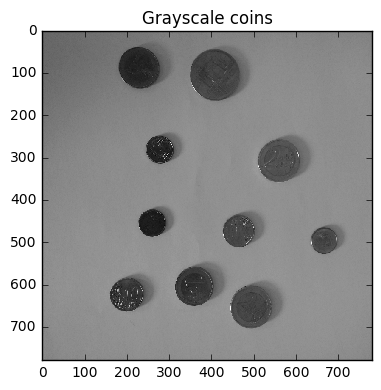

In [3]:
Path = './images/'
image_name = 'coins.jpg'
coins_im = imread(Path.__add__(image_name), as_grey=True) #convertion into greyscale while loading
coins_im = img_as_ubyte(coins_im)
coins_im = transform.rescale(coins_im, 1/4)  #reescaling of the original image
plt.title('Grayscale coins')
imshow(coins_im)


Subsquently, threshold the image using a global Otsu's thresholding after converting the image into gray scale. Display the image.

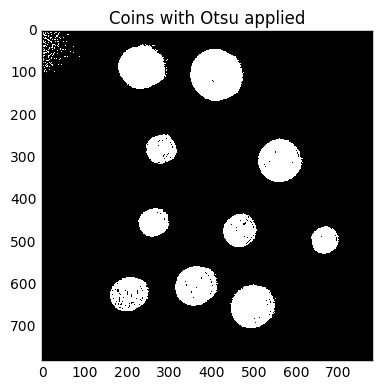

In [4]:
coins_im = 1- coins_im #inverting colors
local_otsu = threshold_otsu(coins_im, 256) #applying Otsu
global_otsu = coins_im >= local_otsu  #binarizing thanks to the threshold obtained from Otsu
plt.figure()
plt.title('Coins with Otsu applied')
imshow(global_otsu)

Clean the image using some morphological operations, i.e. erosion, dilation, opening, closing ...

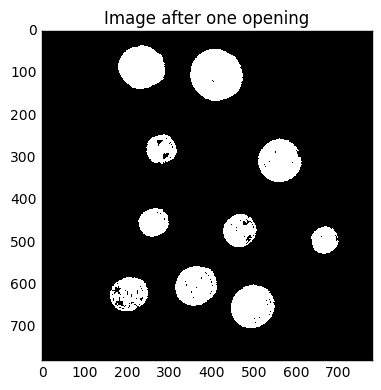

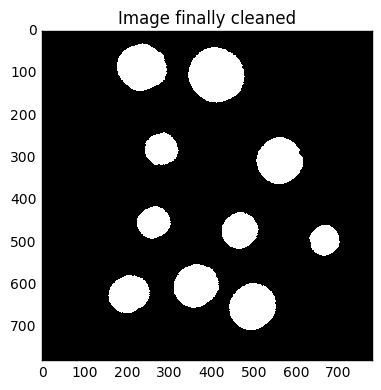

In [5]:
selem = disk(2)  #defining a structuring object type disk of radious 2
coins_opening = binary_opening(global_otsu, selem) #applying opening
plt.figure()
plt.title('Image after one opening')
imshow (coins_opening)

coins_dilated = binary_dilation(coins_opening, selem) #applying double dilation and a closing
coins_dilated2 = binary_dilation(coins_dilated, selem)
coins_closing = binary_closing(coins_dilated2, selem)

coins_clean = coins_closing
plt.figure()
plt.title('Image finally cleaned')
imshow (coins_clean)

Using the functions [`label`](http://scikit-image.org/docs/stable/api/skimage.measure.html#skimage.measure.label) and [`regionprops`](http://scikit-image.org/docs/stable/api/skimage.measure.html#skimage.measure.regionprops) determine, the radius of each region and determine the number of type of coins in the image.

1. Show the image with the different labels.
1. How many regions do you find?
1. Display the radius of each region. Draw the corresponding circle on the image.

/home/dani/anaconda3/lib/python3.5/site-packages/skimage/io/_plugins/matplotlib_plugin.py:74: UserWarning: Low image dynamic range; displaying image with stretched contrast.
  warn("Low image dynamic range; displaying image with "


The number of regions found is : 10
   
10
(87.5758995315459, 234.71613674872918)
(105.73384430417794, 410.42658551247371)
(281.07550010755, 280.84254678425469)
(308.5911793319641, 559.40168630418339)
(454.32502708559048, 262.81495124593715)
(473.48153334500262, 465.53492035708035)
(496.38715410002538, 665.61284589997467)
(603.79676537043645, 362.45748602687598)
(623.46563856864805, 204.58182362629137)
(653.11102894570035, 495.85748996408199)
   
56.5119729622137
65.0850825100029
38.46846319868319
54.26494961838855
38.327537420739596
42.64392547324878
35.40935810881004
51.736523200921575
46.10847785192586
54.891906348894125
   
The fact that only 9 of the 10 coins are recognised is because of the structuring element used


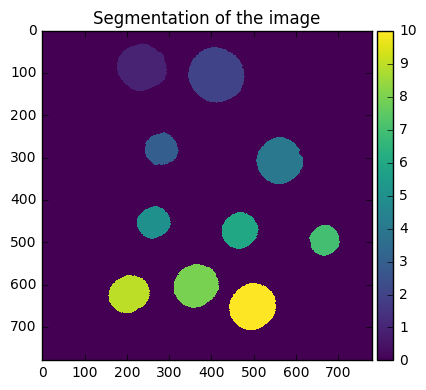

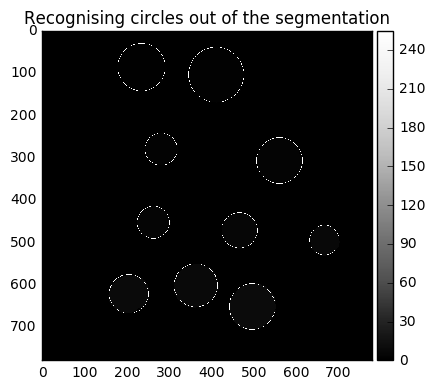

In [6]:
labels, num = label(coins_clean, neighbors=4, background=0, return_num=True, connectivity=True)
#considering all values with the value of the background(0) to be, indeed, background
plt.figure()
plt.title('Segmentation of the image')
imshow(labels)
print ('The number of regions found is :', num)
print('   ')

props = regionprops(labels)
print(len(props))
for i in range(0,len(props)):
    print (props[i].centroid)    #showing the locations of each region found
print ('   ')
for i in range(0,len(props)):
    print (props[i].equivalent_diameter/2)  #showing the radious of each region found  

print('   ')
print ('The fact that only 9 of the 10 coins are recognised is because of the structuring element used')

for i in range (len(props)):  #drawing of the cirles out of the regions and their centroids
    circles_coord = draw.circle_perimeter(int(props[i].centroid[0]), int(props[i].centroid[1]), int(props[i].equivalent_diameter/2))
    labels[circles_coord[0], circles_coord[1]]= 255

plt.figure()    
plt.title('Recognising circles out of the segmentation')
imshow(labels, cmap= cm.Greys_r)

## Segmentation of markers

Considering the techniques you used in the previous exercise, try to segment different objects in `objets4.jpg` image.

Using segmentation find the number of each object in the image. 

Considering that this is not as straight forward as the previous example, come up with your creative solutions and in case of failar explain the reasons and problems. 

/home/dani/anaconda3/lib/python3.5/site-packages/skimage/util/dtype.py:110: UserWarning: Possible precision loss when converting from float64 to uint8
  "%s to %s" % (dtypeobj_in, dtypeobj))
/home/dani/anaconda3/lib/python3.5/site-packages/skimage/io/_plugins/matplotlib_plugin.py:74: UserWarning: Low image dynamic range; displaying image with stretched contrast.
  warn("Low image dynamic range; displaying image with "
/home/dani/anaconda3/lib/python3.5/site-packages/skimage/morphology/misc.py:122: UserWarning: Only one label was provided to `remove_small_objects`. Did you mean to use a boolean array?
  warn("Only one label was provided to `remove_small_objects`. "
/home/dani/anaconda3/lib/python3.5/site-packages/skimage/morphology/misc.py:194: UserWarning: Any labeled images will be returned as a boolean array. Did you mean to use a boolean array?
  "Did you mean to use a boolean array?", UserWarning)


<function polygon_perimeter at 0x7f8ac6fffea0>

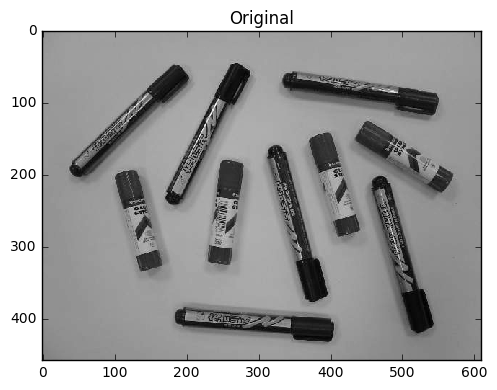

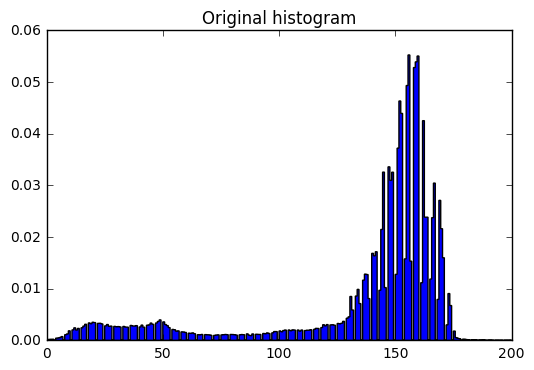

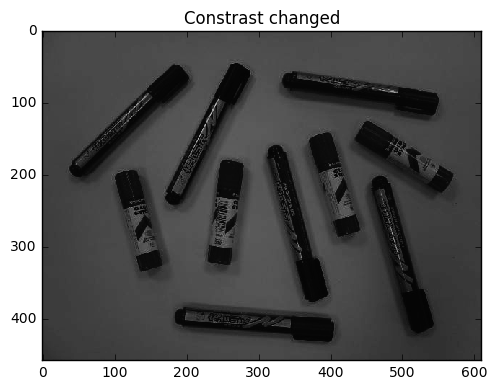

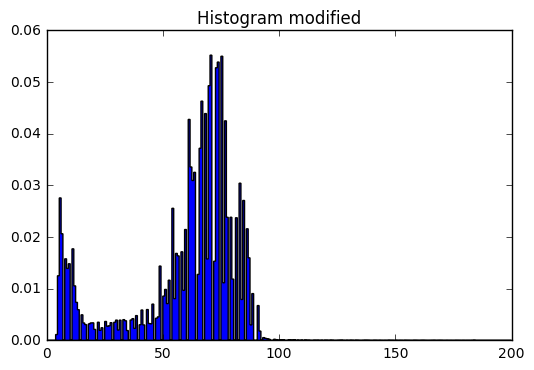

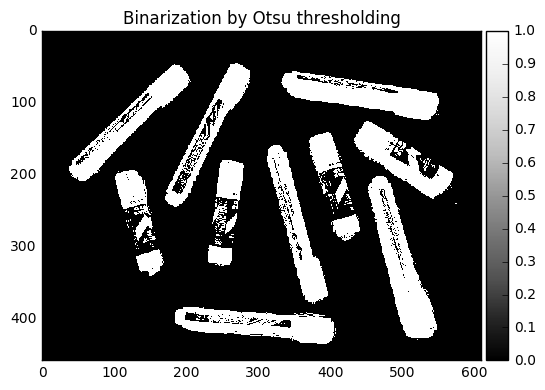

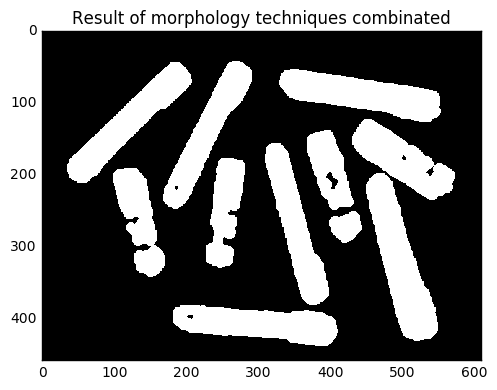

In [7]:
Path = './images/'
image_name = 'objets4.jpg'
obj_im = imread(Path.__add__(image_name), as_grey=True)
obj_im = img_as_ubyte(obj_im)
plt.figure()
plt.title('Original')
imshow(obj_im)

from skimage import exposure   #importing exposure in order to perform enhancement

# Show the magnitude image and its histogram
plt.figure()
plt.title('Original histogram')
n, bins, patches = plt.hist(obj_im.ravel(), 256, range=(0., 200.), normed=1, histtype='stepfilled')
# Apply the sigmoid function on the first peak
obj_sig_1 = exposure.adjust_sigmoid(obj_im, cutoff=0.8, gain=5)

# Show the magnitude image and its histogram
plt.figure()
plt.title('Constrast changed')
imshow(obj_sig_1)
#showing the modified histogram
plt.figure()
plt.title('Histogram modified')
n, bins, patches = plt.hist(obj_sig_1.flatten(), 256, range=(0., 200.), normed=1, histtype='stepfilled')


obj_sig_1 = 1- obj_sig_1 #Inverting colours

#Applying Otsu to get threshold, and after manually setting ones or zeros (binarizing) to the image.
#If it is done like previously (global_otsu = coins_im >= local_otsu),  
#we don't get 1s and 0s, but True and False values, and we cannot operate with that
s=threshold_otsu(obj_sig_1)
for i in range (obj_sig_1.shape[0]):
    for j in range (obj_sig_1.shape[1]):
        if obj_sig_1[i,j]>s:
            obj_sig_1[i,j]=1
        else:
            obj_sig_1[i,j]=0
plt.figure()
plt.title('Binarization by Otsu thresholding')
imshow(obj_sig_1, cmap=cm.Greys_r)

#defining different structural elements
selem1 = diamond(3)
selem2 = disk(3)
selem3= octagon(6,2)
selem4=disk(2)

#Applying combinations of different morphologic techniques by trial and error
#until the best combination is found

obj_op = obj_sig_1

obj_op= remove_small_objects(obj_op)
obj_op= remove_small_holes(obj_op,64)

obj_op= binary_dilation(obj_op,selem3)
obj_op = binary_erosion(obj_op,selem1)
obj_op = binary_opening(obj_op, selem3)
obj_op = binary_opening(obj_op, selem3)
obj_op = binary_erosion(obj_op,disk(1))
obj_op = binary_opening(obj_op, selem3)
obj_op= binary_dilation(obj_op,disk(2))
obj_clean = obj_op

plt.figure()
plt.title('Result of morphology techniques combinated')
imshow(obj_clean, cmap=cm.Greys_r)

draw.polygon_perimeter

/home/dani/anaconda3/lib/python3.5/site-packages/skimage/io/_plugins/matplotlib_plugin.py:74: UserWarning: Low image dynamic range; displaying image with stretched contrast.
  warn("Low image dynamic range; displaying image with "


The number of regions found is : 11
   
Not all the objects have been recognised. That is due to the little distances between the objects in the right side of the image. Also one of the object has been splitted into 2 parts.That is why the number of regions found is 11 and not 10. Anyway, this is the best result found.
   
The strategy that i followed has been: due to the fact that the shadows played a big role, i have modified the constrast in order to be able to segment better.
   
I tried several thresholding methods, but non of them seems to give a good answer to our necessities, so i sticked to OTSU.
I have done different opening-closing-dilation-erosion combinations, being this the best result found so far. Almost all of the object have been recognised.
   
The final conclusion: I think that the key action is modifying the histogram more accurately than i did in order to better enhance the contrast, so that would be the next step to do from here.


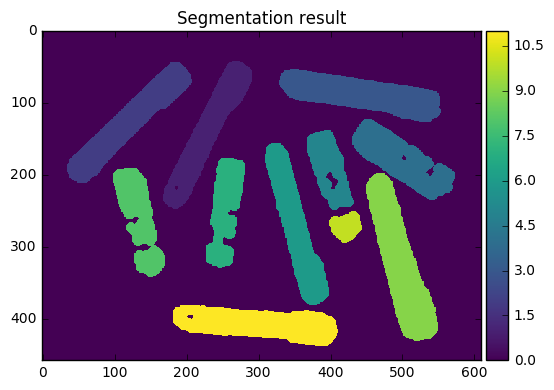

In [8]:
labels, num = label(obj_clean, neighbors=8, background=0, return_num=True, connectivity=True)
#considering all values with the value of the background(0) to be, indeed, background
plt.figure()
plt.title('Segmentation result')
imshow(labels)
print ('The number of regions found is :', num)
print('   ')
print ('Not all the objects have been recognised. That is due to the little distances between the objects in the right side of the image. Also one of the object has been splitted into 2 parts.That is why the number of regions found is 11 and not 10. Anyway, this is the best result found.' )
print('   ')
print ('The strategy that i followed has been: due to the fact that the shadows played a big role, i have modified the constrast in order to be able to segment better.')
print('   ')
print('I tried several thresholding methods, but non of them seems to give a good answer to our necessities, so i sticked to OTSU.')
print('I have done different opening-closing-dilation-erosion combinations, being this the best result found so far. Almost all of the object have been recognised.')
print('   ')
print ('The final conclusion: I think that the key action is modifying the histogram more accurately than i did in order to better enhance the contrast, so that would be the next step to do from here.')

In [41]:
props = regionprops(labels)
big_pen=0
little_pen=0
counter2=0
total_pen=0
print('The areas of the different regions segmented are:')
print('   ')

for i in range(0,len(props)):
        print (props[i].area)
        if props[i].area > 2000: #we will start computing from this area, due to the part we couldn't segment
            if props[i].area > 7500:
                big_pen = big_pen + 1 #increase number big pens
                total_pen = total_pen +1 #increase number of pens in total
            else: 
                little_pen = little_pen + 1 #increase number little pens
                total_pen = total_pen +1 #increase number of pens in total also
print('   ')

print ('The most little area is the part of the pen that i couldnt segment previously, so i compute starting from areas bigger that that.Still we have 11 regions instead of 10.')        
print('   ')

print ('Number of pens:')
print (total_pen)
print ('Number of big pens:')
print (big_pen)
print ('Number of little pens:')
print (little_pen)


                


The areas of the different regions segmented are:
   
7892
8460
9269
7360
4211
7949
5215
5636
10464
1402
8740
   
The most little area is the part of the pen that i couldnt segment previously, so i compute starting from areas bigger that that.Still we have 11 regions instead of 10.
   
Number of pens:
10
Number of big pens:
6
Number of little pens:
4
